# Single model

In [ ]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score,log_loss,f1_score
from sklearn.utils import shuffle
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
sns.set()
sns.color_palette("rocket_r")
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
df=pd.read_csv('/Users/helloworld/Downloads/fetal_health.csv')
df['fetal_health']=df['fetal_health'].astype(str)
df['fetal_health']=df['fetal_health'].str.replace('1','0')
df['fetal_health']=df['fetal_health'].str.replace('2','1')
df['fetal_health']=df['fetal_health'].str.replace('3','2')
#sklearn.datasets.load_wine(*, return_X_y=False, as_frame=False)
df['fetal_health']=df['fetal_health'].astype(float)
df['fetal_health']=df['fetal_health'].astype(int)

#clas1=df[df['fetal_health']==0]
#clas2=df[df['fetal_health']==1]
#clas3=df[df['fetal_health']==2]
#pd.concat([clas1,clas2,clas3])
#shuffle(pd.concat([clas1,clas2,clas3]))
dftarget=df['fetal_health']
dfdata=df.drop('fetal_health',axis=1)
X_train, X_test, y_train, y_test = train_test_split(dfdata,dftarget,test_size=0.2)
#y_pred=np.zeros((len(X_test),3))
data=pd.concat([X_train,y_train],axis=1)
clas1=data[data['fetal_health']==0]
clas2=data[data['fetal_health']==1]
clas3=data[data['fetal_health']==2]
a=clas1.sample(frac=1)
b=clas2.sample(frac=1)
c=clas3.sample(frac=1)
df1=shuffle(pd.concat([a,b,c]))
y_train=df1['fetal_health']
X_train=df1.drop('fetal_health',axis=1)
# 转换为Dataset数据格式
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test)
params = {
'learning_rate': 0.1,
'lambda_l1': 0.1,
'lambda_l2': 0.2,
'max_depth': 4,
'objective': 'multiclass',  # 目标函数
'num_class': 3,
}
gbm = lgb.train(params, train_data, valid_sets=[validation_data])
y_pred=gbm.predict(X_test)

In [3]:
print(log_loss(y_test,y_pred))
y_pred = [list(z).index(max(z)) for z in y_pred]
print(f1_score(y_test,y_pred, average='macro'))

0.1935923986432852
0.8516232038014545


## GA-esemble

## import modular

In [29]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score,log_loss,f1_score
from sklearn.utils import shuffle
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
sns.set()
sns.color_palette("rocket_r")
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

## Load data:fetal-health

<Figure size 432x288 with 0 Axes>

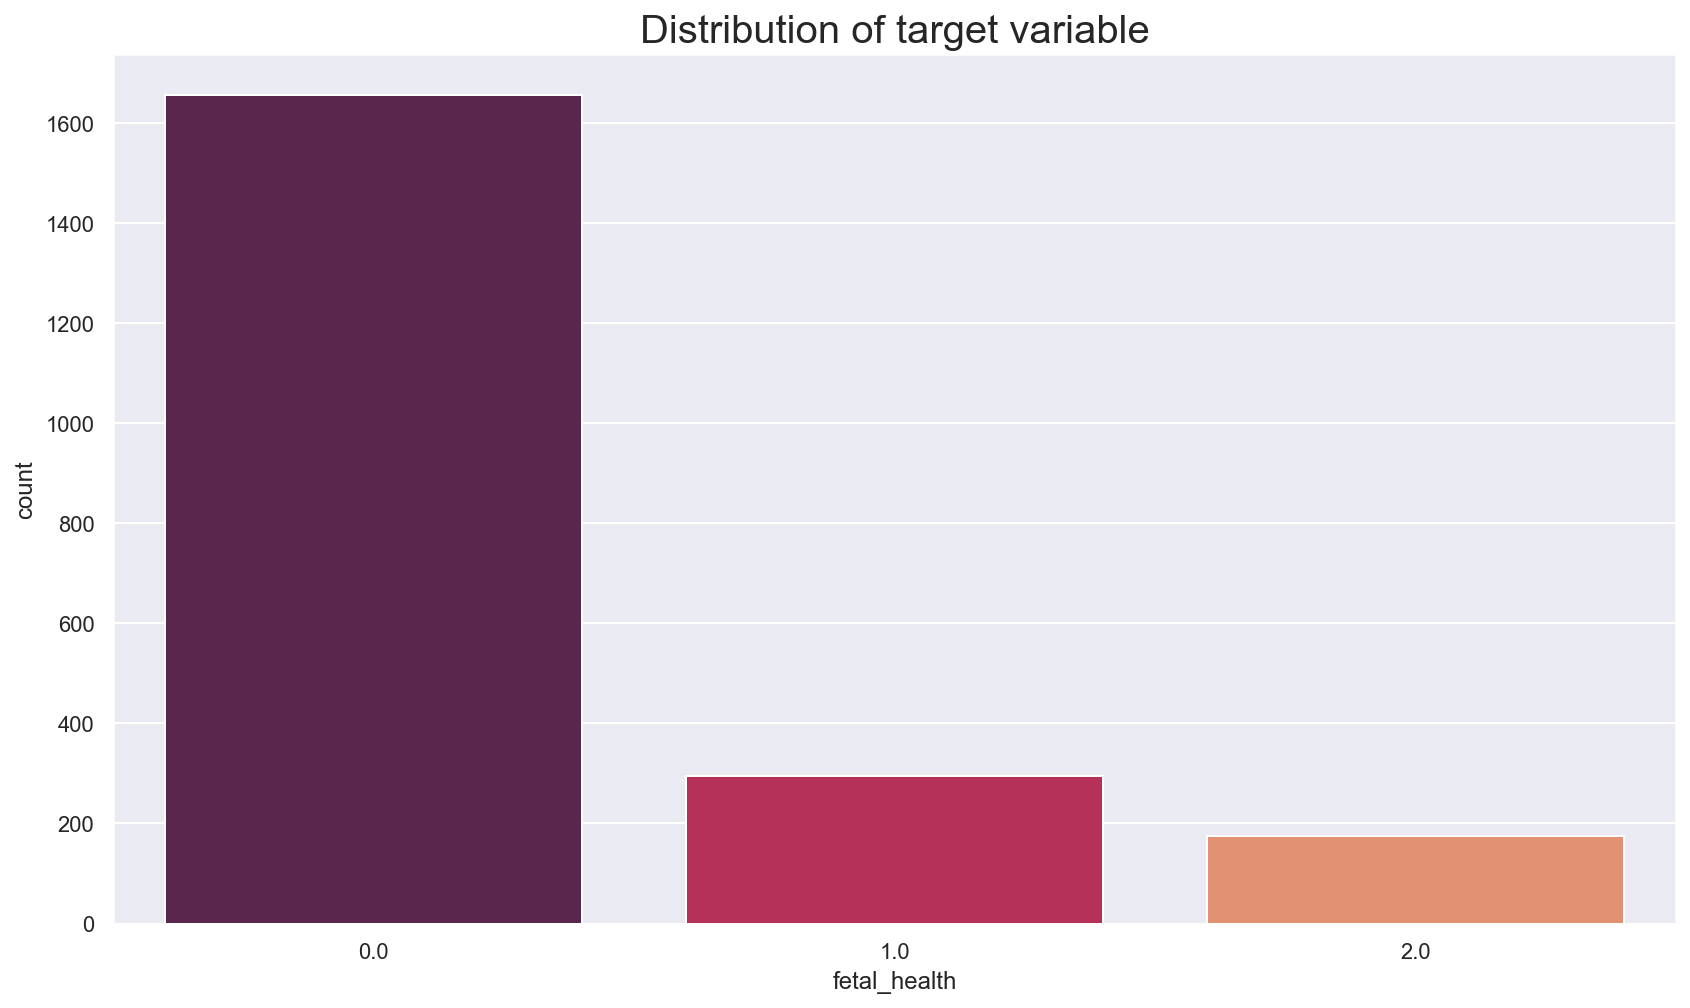

In [30]:
df=pd.read_csv('/Users/helloworld/Downloads/fetal_health.csv')
df['fetal_health']=df['fetal_health'].astype(str)
df['fetal_health']=df['fetal_health'].str.replace('1','0')
df['fetal_health']=df['fetal_health'].str.replace('2','1')
df['fetal_health']=df['fetal_health'].str.replace('3','2')
plt.figure()
fig, ax = plt.subplots(1, 1,figsize=(14, 8))
sns.countplot(data=df, x='fetal_health',palette='rocket',order=df['fetal_health'].value_counts().index)
plt.title('Distribution of target variable',size = 20)
plt.show()

## data preprocessing

In [31]:
#sklearn.datasets.load_wine(*, return_X_y=False, as_frame=False)
df['fetal_health']=df['fetal_health'].astype(float)
df['fetal_health']=df['fetal_health'].astype(int)



## lightgbm

In [32]:
# 定义评价函数
def evaluatescore(x):
    dftarget=df['fetal_health']
    dfdata=df.drop('fetal_health',axis=1)
    X_train, X_test, y_train, y_test = train_test_split(dfdata,dftarget,test_size=0.2)
    y_pred=np.zeros((len(X_test),3))
    data=pd.concat([X_train,y_train],axis=1)
    for i in range(0,5):
        clas1=data[data['fetal_health']==0]
        clas2=data[data['fetal_health']==1]
        clas3=data[data['fetal_health']==2]
        a=clas1.sample(frac=x[i*3])
        b=clas2.sample(frac=x[i*3+1])
        c=clas3.sample(frac=x[i*3+2])
        df1=shuffle(pd.concat([a,b,c]))
        y_train=df1['fetal_health']
        X_train=df1.drop('fetal_health',axis=1)
        # 转换为Dataset数据格式
        train_data = lgb.Dataset(X_train, label=y_train)
        validation_data = lgb.Dataset(X_test, label=y_test)
        params = {
            'learning_rate': 0.1,
            'lambda_l1': 0.1,
            'lambda_l2': 0.2,
            'max_depth': 4,
            'objective': 'multiclass',  # 目标函数
            'num_class': 3,
        }
        gbm = lgb.train(params, train_data, valid_sets=[validation_data])
        y_pred = y_pred+gbm.predict(X_test)*x[15+i]
        
    
    #y_pred = [list(z).index(max(z)) for z in y_pred]
    return log_loss(y_test, y_pred),

## GA-algorithm

In [33]:
from deap import base
from deap import creator
from deap import tools
import random
import matplotlib.pyplot as plt
#超参数声明
IND_SIZE = 20    #length of bit string to be optimized
POPULATION_SIZE = 200   #number of individuals in population
P_CROSSOVER = 0.9       #probability for crossover
P_MUTATION = 0.1        #probability for mutating an individual
MAX_GENERATION = 50     #max number of generations for stopping condition
toolbox = base.Toolbox()#定义toolbox变量
toolbox.register('Attr_float', random.random)
creator.create("FitnessMax",base.Fitness,weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox.register("individualCreator",tools.initRepeat,creator.Individual,toolbox.Attr_float,n=IND_SIZE)
toolbox.register("populationCreator",tools.initRepeat,list,toolbox.individualCreator)

toolbox.register("evaluate",evaluatescore)
toolbox.register("select",tools.selTournament,tournsize=3)
toolbox.register("mate",tools.cxOnePoint)
# mutFlipBit函数遍历个体的所有特征，并且对于每个特征值，
# 都将使用indpb参数值作为翻转（应用not运算符）该特征值的概率。
# 该值与突变概率无关，后者由P_MUTATION常数设置。
# 突变概率用于确定是否为种群中的给定个体调用mutFlipBit函数
toolbox.register("mutate",tools.mutFlipBit,indpb=1.0/IND_SIZE)




def main():
    population = toolbox.populationCreator(n=POPULATION_SIZE)
    generationCounter = 0
    fitnessValues = list(map(toolbox.evaluate,population))

    for individual,fitnessValue in zip(population,fitnessValues):
        individual.fitness.values = fitnessValue

    fitnessValues = [individual.fitness.values[0] for individual in population]

    maxFitnessValues = []
    meanFitnessValues = []

    while max(fitnessValues) < ONE_MAX_LENGTH and generationCounter < MAX_GENERATION:
        generationCounter = generationCounter + 1
        
        offspring = toolbox.select(population,len(population))
        offspring = list(map(toolbox.clone,offspring))

        for child1,child2 in zip(offspring[::2],offspring[1::2]):
            if random.random() < P_CROSSOVER:
                toolbox.mate(child1,child2)
                del child1.fitness.values
                del child2.fitness.values
        
        for mutant in offspring:
            if random.random() < P_MUTATION:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        
        freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
        freshFitnessValues = list(map(toolbox.evaluate,freshIndividuals))
        for individual,fitnessValue in zip(freshIndividuals,freshFitnessValues):
            individual.fitness.values = fitnessValue
        
        population[:] = offspring

        fitnessValues = [ind.fitness.values[0] for ind in population]

        maxFitnessValue = max(fitnessValues)
        meanFitnessValue = sum(fitnessValues) / len(population)
        maxFitnessValues.append(maxFitnessValue)
        meanFitnessValues.append(meanFitnessValue)
        print("- Generation {}: Max Fitness = {}, Avg Fitness = {}".format(generationCounter,maxFitnessValue,meanFitnessValue))

        best_index = fitnessValues.index(max(fitnessValues))
        print("Best Indivadual = ", *population[best_index],"\n")

    plt.plot(maxFitnessValues,color="red")
    plt.plot(meanFitnessValues,color="green")
    plt.xlabel("Generation")
    plt.ylabel("Max / Average Fitness")
    plt.title("Max and Average fitness over Generation")
    plt.show()



/Users/helloworld/opt/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/helloworld/opt/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
main()

In [ ]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score,log_loss,f1_score
from sklearn.utils import shuffle
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
sns.set()
sns.color_palette("rocket_r")
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
df=pd.read_csv('/Users/helloworld/Downloads/fetal_health.csv')
df['fetal_health']=df['fetal_health'].astype(str)
df['fetal_health']=df['fetal_health'].str.replace('1','0')
df['fetal_health']=df['fetal_health'].str.replace('2','1')
df['fetal_health']=df['fetal_health'].str.replace('3','2')
#sklearn.datasets.load_wine(*, return_X_y=False, as_frame=False)
df['fetal_health']=df['fetal_health'].astype(float)
df['fetal_health']=df['fetal_health'].astype(int)
# 定义评价函数
def evaluatescore(x):
    dftarget=df['fetal_health']
    dfdata=df.drop('fetal_health',axis=1)
    X_train, X_test, y_train, y_test = train_test_split(dfdata,dftarget,test_size=0.2)
    y_pred=np.zeros((len(X_test),3))
    data=pd.concat([X_train,y_train],axis=1)
    for i in range(0,5):
        clas1=data[data['fetal_health']==0]
        clas2=data[data['fetal_health']==1]
        clas3=data[data['fetal_health']==2]
        a=clas1.sample(frac=x[i*3])
        b=clas2.sample(frac=x[i*3+1])
        c=clas3.sample(frac=x[i*3+2])
        df1=shuffle(pd.concat([a,b,c]))
        y_train=df1['fetal_health']
        X_train=df1.drop('fetal_health',axis=1)
        # 转换为Dataset数据格式
        train_data = lgb.Dataset(X_train, label=y_train)
        validation_data = lgb.Dataset(X_test, label=y_test)
        params = {
            'learning_rate': 0.1,
            'lambda_l1': 0.1,
            'lambda_l2': 0.2,
            'max_depth': 4,
            'objective': 'multiclass',  # 目标函数
            'num_class': 3,
        }
        gbm = lgb.train(params, train_data, valid_sets=[validation_data])
        y_pred = y_pred+gbm.predict(X_test)*x[15+i]
        
    
    #y_pred = [list(z).index(max(z)) for z in y_pred]
    return log_loss(y_test, y_pred),

from deap import base
from deap import creator
from deap import tools
import random
import matplotlib.pyplot as plt
#超参数声明
ONE_MAX_LENGTH = 20    #length of bit string to be optimized
POPULATION_SIZE = 200   #number of individuals in population
P_CROSSOVER = 0.9       #probability for crossover
P_MUTATION = 0.1        #probability for mutating an individual
MAX_GENERATION = 50     #max number of generations for stopping condition
toolbox = base.Toolbox()#定义toolbox变量
toolbox.register('Attr_float', random.random)
creator.create("FitnessMax",base.Fitness,weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox.register("individualCreator",tools.initRepeat,creator.Individual,toolbox.Attr_float,n=ONE_MAX_LENGTH)
toolbox.register("populationCreator",tools.initRepeat,list,toolbox.individualCreator)

toolbox.register("evaluate",evaluatescore)
toolbox.register("select",tools.selTournament,tournsize=3)
toolbox.register("mate",tools.cxOnePoint)
# mutFlipBit函数遍历个体的所有特征，并且对于每个特征值，
# 都将使用indpb参数值作为翻转（应用not运算符）该特征值的概率。
# 该值与突变概率无关，后者由P_MUTATION常数设置。
# 突变概率用于确定是否为种群中的给定个体调用mutFlipBit函数
toolbox.register("mutate",tools.mutFlipBit,indpb=1.0/ONE_MAX_LENGTH)




def main():
    population = toolbox.populationCreator(n=POPULATION_SIZE)
    generationCounter = 0
    fitnessValues = list(map(toolbox.evaluate,population))

    for individual,fitnessValue in zip(population,fitnessValues):
        individual.fitness.values = fitnessValue

    fitnessValues = [individual.fitness.values[0] for individual in population]

    maxFitnessValues = []
    meanFitnessValues = []

    while max(fitnessValues) < ONE_MAX_LENGTH and generationCounter < MAX_GENERATION:
        generationCounter = generationCounter + 1
        
        offspring = toolbox.select(population,len(population))
        offspring = list(map(toolbox.clone,offspring))

        for child1,child2 in zip(offspring[::2],offspring[1::2]):
            if random.random() < P_CROSSOVER:
                toolbox.mate(child1,child2)
                del child1.fitness.values
                del child2.fitness.values
        
        for mutant in offspring:
            if random.random() < P_MUTATION:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        
        freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
        freshFitnessValues = list(map(toolbox.evaluate,freshIndividuals))
        for individual,fitnessValue in zip(freshIndividuals,freshFitnessValues):
            individual.fitness.values = fitnessValue
        
        population[:] = offspring

        fitnessValues = [ind.fitness.values[0] for ind in population]

        maxFitnessValue = max(fitnessValues)
        meanFitnessValue = sum(fitnessValues) / len(population)
        maxFitnessValues.append(maxFitnessValue)
        meanFitnessValues.append(meanFitnessValue)
        print("- Generation {}: Max Fitness = {}, Avg Fitness = {}".format(generationCounter,maxFitnessValue,meanFitnessValue))

        best_index = fitnessValues.index(max(fitnessValues))
        print("Best Indivadual = ", *population[best_index],"\n")

    plt.plot(maxFitnessValues,color="red")
    plt.plot(meanFitnessValues,color="green")
    plt.xlabel("Generation")
    plt.ylabel("Max / Average Fitness")
    plt.title("Max and Average fitness over Generation")
    plt.show()


main()